<a href="https://colab.research.google.com/github/Karl-Sancho/challenge3-data-science-LATAM/blob/main/TelecomX_LATAM_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X – Parte 2: Predicción de Cancelación (Churn)

## 🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## 🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

# 🛠️ Preparación de los Datos

## 1- Extracción del Archivo Tratado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/datos_tratados.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


## 2- Verificación de la Proporción de Cancelación (Churn)

In [4]:
df['Churn_number'].value_counts(normalize=True)

,proportion
Churn_number,
0,0.73463
1,0.26537


## 3- Eliminación de Columnas Irrelevantes

In [5]:
df =df.drop(['customerID', 'Churn'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,Churn_number
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1


## 4- Encoding

In [6]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [7]:
X = df.drop('Churn_number', axis=1)
y = df['Churn_number']

In [8]:
columnas = X.columns
columnas

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [9]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['gender', 'SeniorCitizen', 'Partner',
                                       'Dependents', 'PhoneService', 'MultipleLines',
                                       'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                       'DeviceProtection', 'TechSupport', 'StreamingTV',
                                       'StreamingMovies', 'Contract', 'PaperlessBilling',
                                       'PaymentMethod']),
    remainder='passthrough', sparse_threshold=0, force_int_remainder_cols=False
)

In [10]:
X = one_hot.fit_transform(X)

In [11]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet servic

# 🎯 Correlación y Selección de Variables

## 1- Análisis de Correlación

In [12]:
df_encoded = pd.DataFrame(X, columns=one_hot.get_feature_names_out())
df_encoded['Churn_number'] = y
corr = df_encoded.corr()
corr['Churn_number'].sort_values(ascending=False)

,Churn_number
Churn_number,1.000000
onehotencoder__Contract_Month-to-month,0.405103
onehotencoder__OnlineSecurity_No,0.342637
onehotencoder__TechSupport_No,0.337281
onehotencoder__InternetService_Fiber optic,0.308020
onehotencoder__PaymentMethod_Electronic check,0.301919
onehotencoder__OnlineBackup_No,0.268005
onehotencoder__DeviceProtection_No,0.252481
remainder__Charges.Monthly,0.193356
remainder__Cuentas_Diarias,0.193356


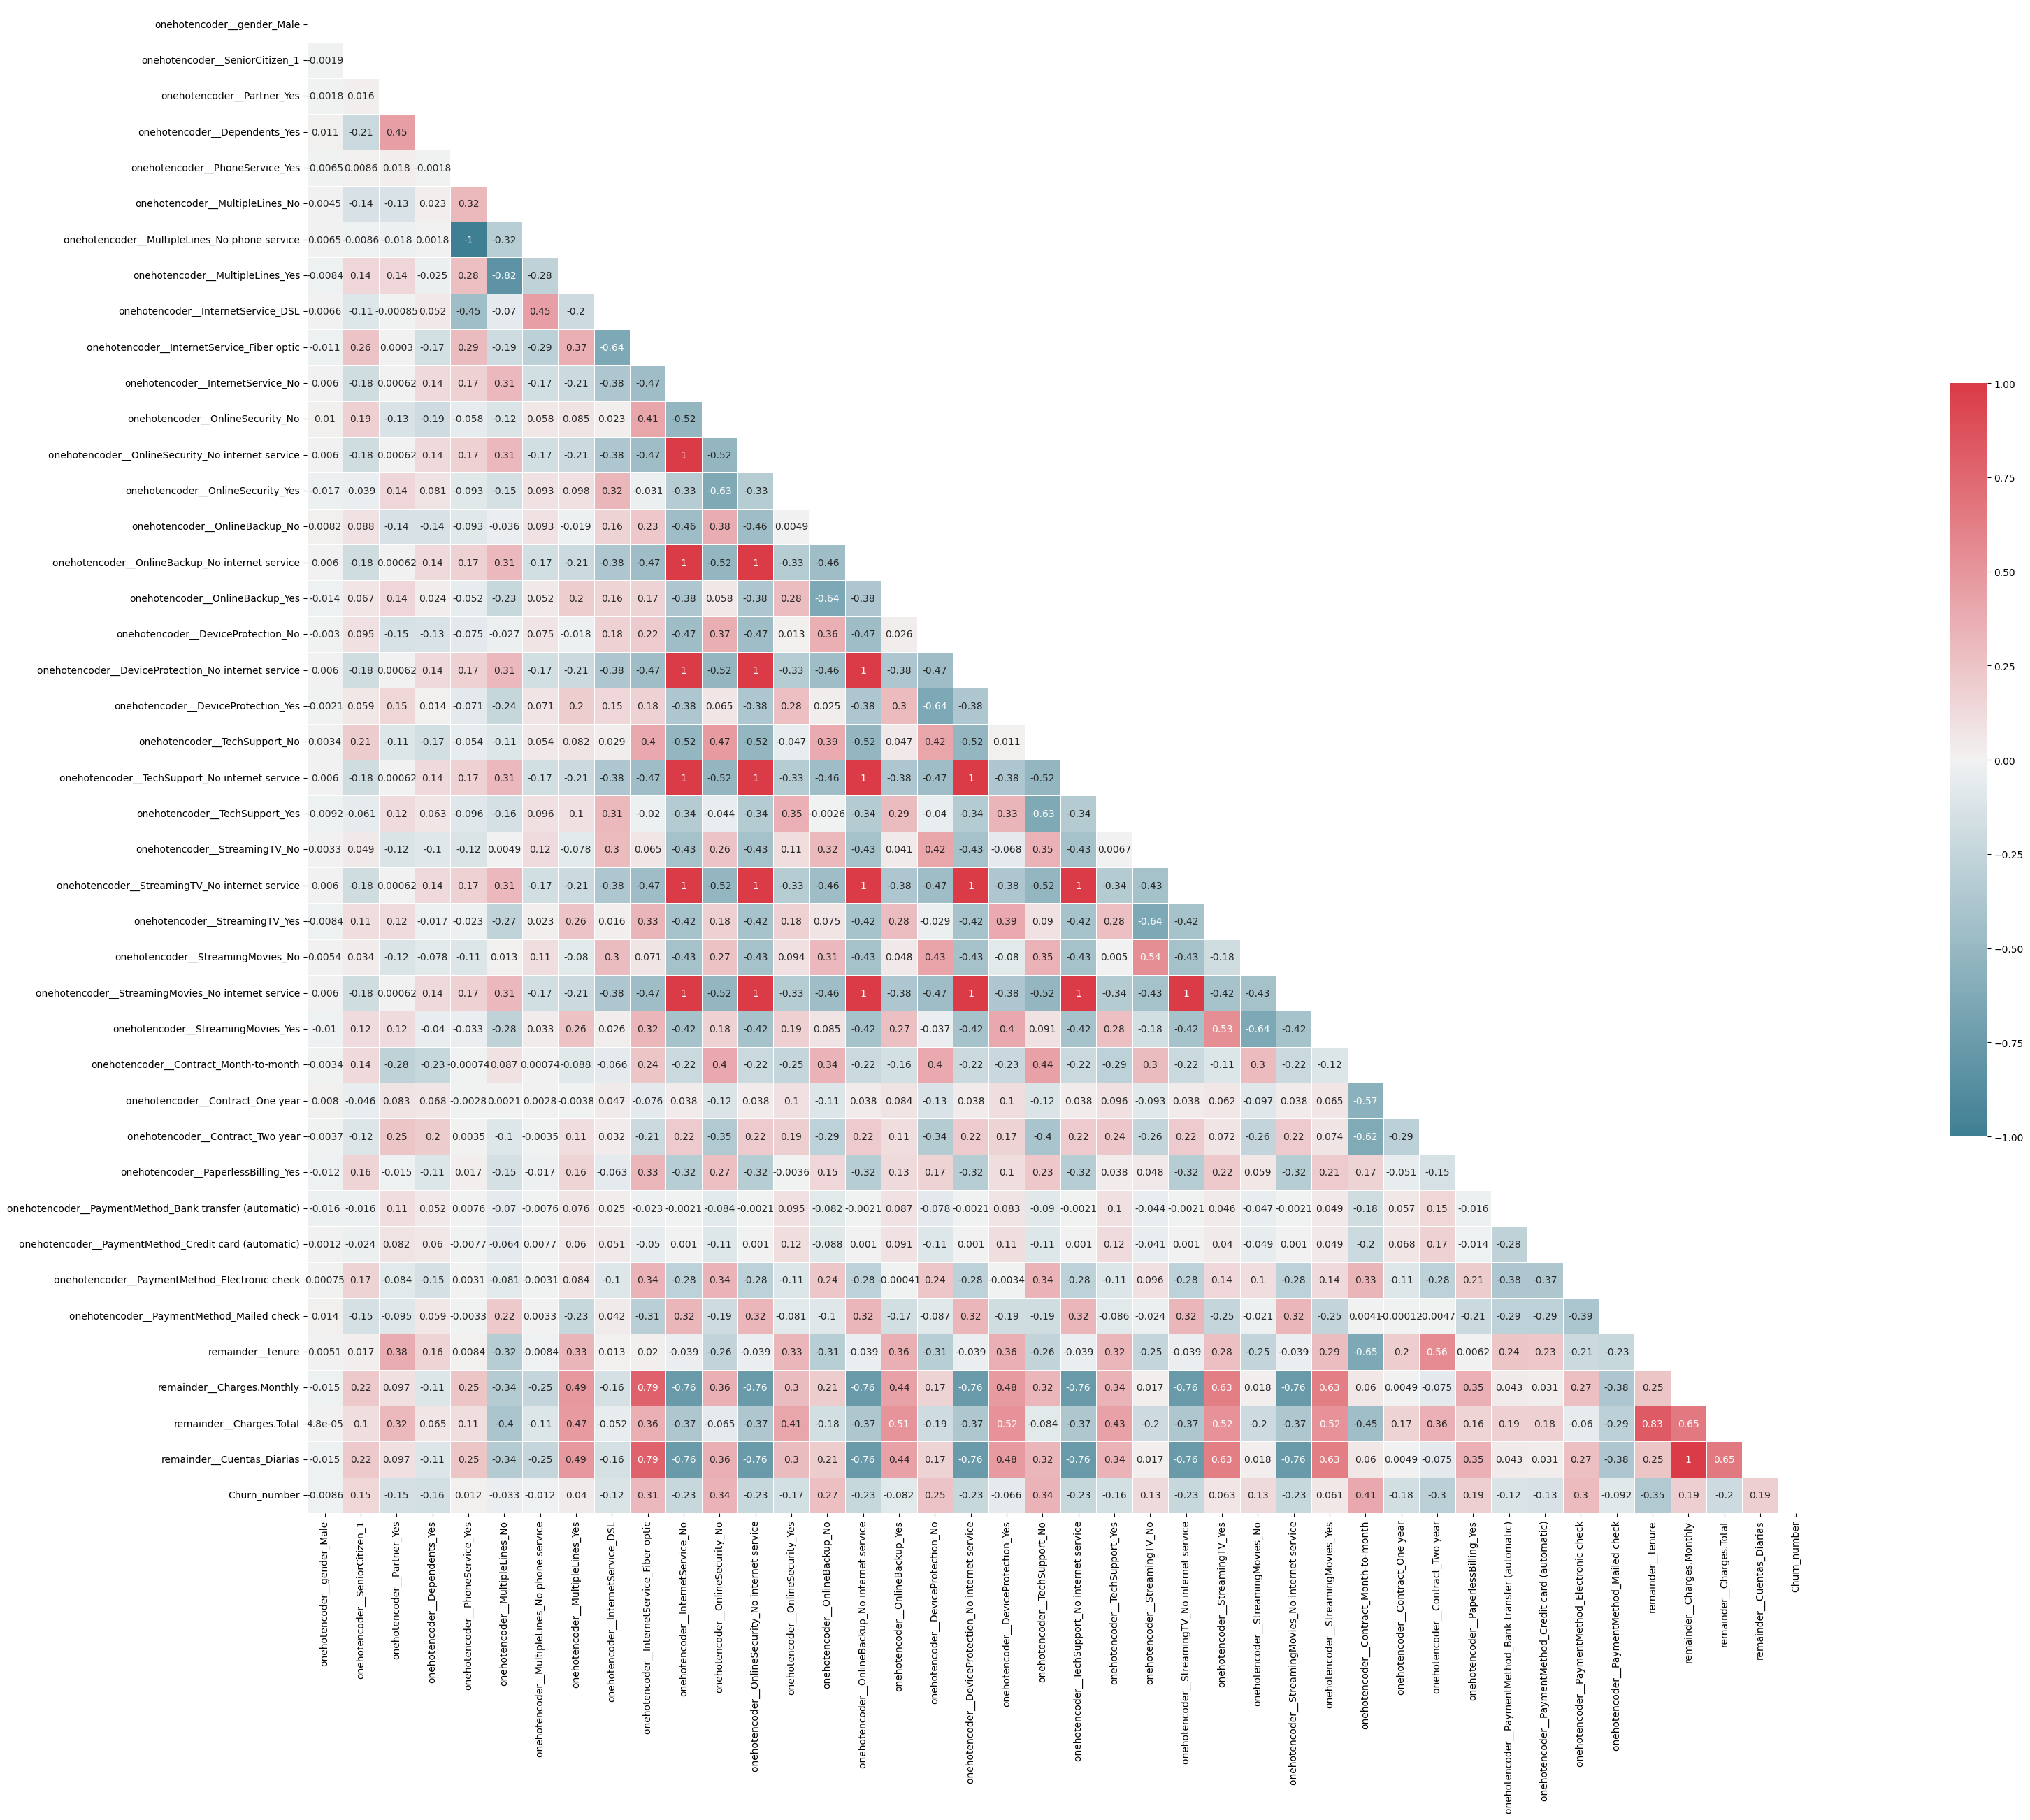

In [13]:
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(50, 28))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

## 2- Análisis Dirigido

In [14]:
px.histogram(df, x='Contract', text_auto=True, color = 'Churn_number', barmode = 'group')

In [15]:
px.box(df_encoded, x='onehotencoder__Contract_Month-to-month', color='Churn_number', y='remainder__tenure')

In [16]:
px.scatter(df_encoded,
           x='remainder__tenure',
           color='Churn_number',
           y='remainder__Charges.Monthly')

# 🤖 Modelado Predictivo

## 1- Separación de Datos

In [17]:
X = pd.DataFrame(X, columns=one_hot.get_feature_names_out())
X

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30,2.186667
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40,1.996667
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85,3.266667
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90,1.838333
7039,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70,2.836667
7040,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75,1.676667
7041,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65,2.261667


In [18]:
y

,Churn_number
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)

# 2- Creación de Modelos

## Modelo de referencia - Baseline

In [21]:
from sklearn.dummy import DummyClassifier

In [22]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test,y_test)

0.73450070989115

## Árboles de Decisión

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [25]:
modelo_arbol.score(X_test, y_test)

0.7846663511594889

In [26]:
modelo_arbol.score(X_train, y_train)

0.7939148073022312